# Breast Cancer Classification Tutorial

The `scikit-learn` library is a popular machine learning library for Python, and provides tools for data analysis and machine learning. In this tutorial, we will use `scikit-learn` to classify breast cancer data.

## Setup

To run this tutorial on your local computer, you will need to install `scikit-learn`. You can install `scikit-learn` using `pip`:

```bash
pip install scikit-learn
```

First, we will import the required libraries.

In [10]:
# import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.metrics import accuracy_score, auc, roc_curve
from matplotlib import pyplot as plt

## Load Dataset

Next, we will load and visualize our dataset, which was retrieved from the [UCI ML Breast Cancer Wisconsin datasets](https://goo.gl/U2Uwz2). The dataset contains 569 samples of fine needle aspirates (FNA) of breast masses, and features were computed from digitized FNA images. Each tumor sample is labeled as benign (0) or malignant (1). The dataset contains 30 features that describe characteristics of the cell nuclei present in the image.

In [11]:
# load the dataset
data = load_breast_cancer()

# print the names of the 13 features
print("Tumor Features: ", data.feature_names)

Tumor Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Let's extract the relevant features from our dataset. We can see that, as expected, the dataset has 569 samples and 30 features.

In [12]:
# save features and target variables
features = data['data']
labels = data['target']

# get feature and label names
feature_names = data['feature_names']
label_names = data['target_names']

# show number of data points
print("Number of Samples: ", len(features))

# show number of features
print("Number of Features: ", len(feature_names))

Number of Samples:  569
Number of Features:  30


Now, let's examine the first few samples of our dataset.

In [13]:
# show number of classes
print("Number of Classes: ", len(label_names))

# define number of rows to show
number_samples = 2 #@param {type:"slider", min:1, max:10, step:1}

# show first n records
print("Data: ", features[0:number_samples])

# show target values (0 = malignant, 1 = benign)
print("Labels: ", labels[0:number_samples])

Number of Classes:  2
Data:  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
Labels:  [0 0]


# Split Dataset

Next, we will split our dataset into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [14]:
# set test size
test_size = 0.2 #@param {type:"slider", min:0.05, max:0.4, step:0.05}

# pick a seed for reproducibility
seed = 42 #@param {type:"integer"}

# split data into training and test sets
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = test_size, random_state = seed)

# print samples in training and test sets
print("Training Set: ", len(train))
print("Test Set: ", len(test))

Training Set:  455
Test Set:  114


# Train Model

Next, we will train a simple neural network model on our training data. We will use the `MLPClassifier` class from `sklearn.neural_network` to create our model. We will use 3 hidden layers with 30 neurons each and a maximum of 1000 iterations to train our model. For more details on the `MLPClassifier` class, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [15]:
# define model parameters
layer_1 = 30 #@param {type:"slider", min:10, max:100, step:10}
layer_2 = 30 #@param {type:"slider", min:10, max:100, step:10}
layer_3 = 30 #@param {type:"slider", min:10, max:100, step:10}
max_iter = 1000 #@param {type:"slider", min:500, max:5000, step:50}
activation = "relu" #@param ["relu", "logistic", "tanh"]
solver = "adam" #@param ["lbfgs", "sgd", "adam"]

# create a neural network classifier
model = neural_network.MLPClassifier(hidden_layer_sizes = (layer_1,layer_2,layer_3), max_iter = max_iter, activation = activation, solver = solver, random_state = seed)

# print model details
print(model)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)


Next, we will train our model on our training data.

In [16]:
# train the model
model.fit(train, train_labels)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)

# Evaluate Model

Finally, we will evaluate our model on our testing data. We will use the `accuracy_score` function from `sklearn.metrics` to calculate the accuracy of our model.

In [17]:
# make predictions on the test set
predictions = model.predict(test)

# print the accuracy
print("Accuracy: ", accuracy_score(test_labels, predictions))

Accuracy:  0.9385964912280702


Visualize with an ROC curve.

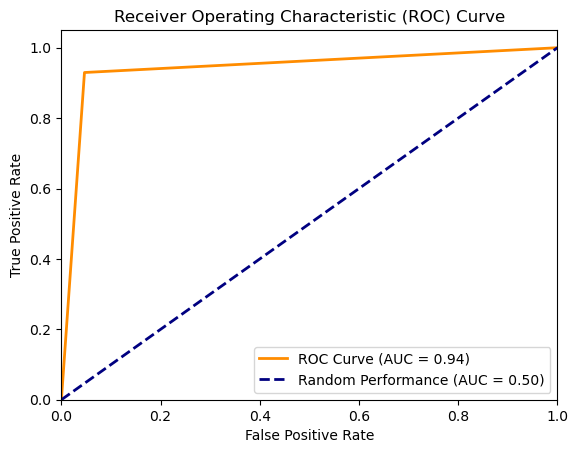

In [18]:
# compute false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(test_labels, predictions)

# compute area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Performance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()